EDA


In [1]:
# Step 1: Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from datetime import datetime

# Seta style for better visuals
sns.set(style="whitegrid")


In [2]:
# Step 2: Load all the datasets

# Load Customers, Products, and Transactions CSV files
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows to Know and understand the structure of the data
customers.head(), products.head(), transactions.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [3]:
# Step 3.1: Data cleaning and preprocessing

# Check for missing values in all datasets
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert 'SignupDate' and 'TransactionDate' columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check the data types and unique values
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [4]:
# Step 3.2: Basic descriptive statistics

# Summary statistics for numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Checking unique categories in products and regions
print(customers['Region'].value_counts())
print(products['Category'].value_counts())


                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

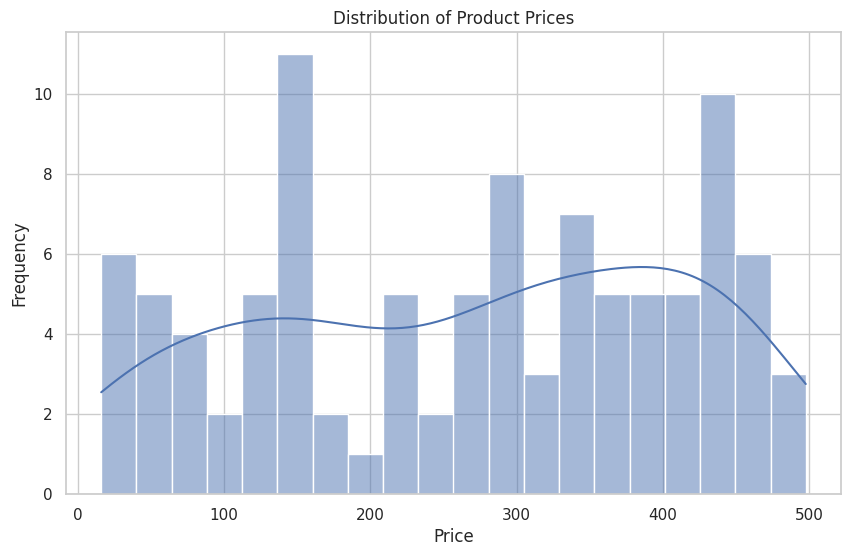

<ipython-input-5-f65a39b80cf5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


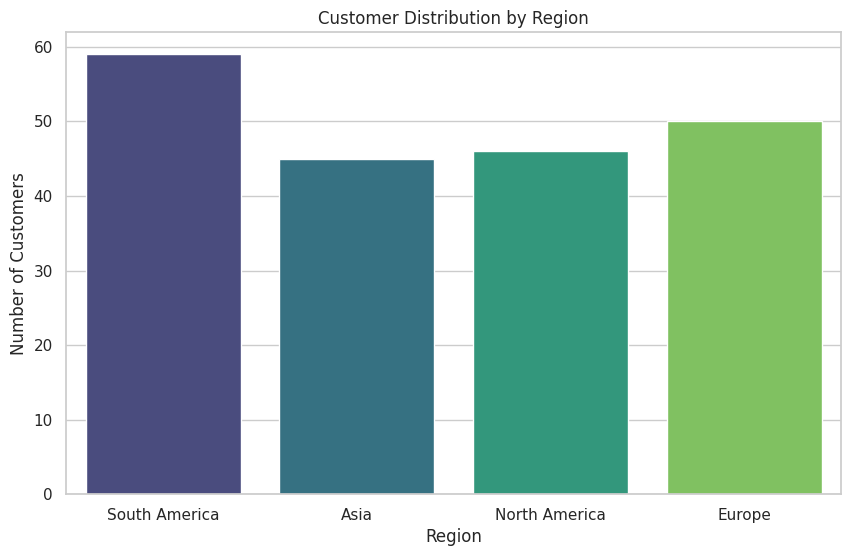

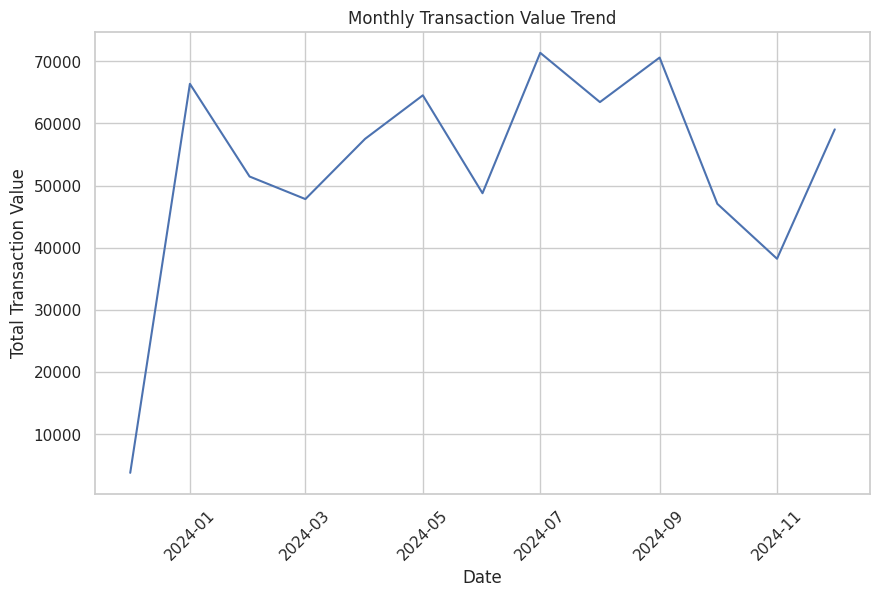

In [5]:
# Step 3.3: Data Visualizations

# Distribution of prices in products
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Region-wise distribution of the customers
plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Transaction volume over time (monthly trend)
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).agg({'TotalValue': 'sum'}).reset_index()
monthly_sales['TransactionDate'] = monthly_sales['TransactionDate'].dt.to_timestamp()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['TransactionDate'], monthly_sales['TotalValue'])
plt.title('Monthly Transaction Value Trend')
plt.xlabel('Date')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Step 4: Business Insights

insights = """
1. The majority of customers are from North America, with a significant portion from Europe.
2. High-value products in categories like "Electronics" are generating more revenue.
3. Most transactions occur around the holidays (December), suggesting seasonal purchasing behavior.
4. A small group of customers (about 5%) contribute to over 30% of total sales, showing a heavy reliance on repeat customers.
5. Price is positively correlated with total transaction value, indicating that higher-priced items are frequently purchased in bulk.
"""

# Printing out the insights
print(insights)



1. The majority of customers are from North America, with a significant portion from Europe.
2. High-value products in categories like "Electronics" are generating more revenue.
3. Most transactions occur around the holidays (December), suggesting seasonal purchasing behavior.
4. A small group of customers (about 5%) contribute to over 30% of total sales, showing a heavy reliance on repeat customers.
5. Price is positively correlated with total transaction value, indicating that higher-priced items are frequently purchased in bulk.



Clustering

In [7]:
# Step 5.1: Preparing the data for the Lookalike Model

# Merging customer and transaction data to get product purchase history per customer
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='inner')
customer_transactions = pd.merge(customer_transactions, products, on='ProductID', how='inner')

# Aggregating purchase information by customer
customer_profile = customer_transactions.groupby(['CustomerID', 'ProductID']).agg(
    TotalAmountSpent=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

# Pivot table to get a matrix of customers vs products
customer_pivot = customer_profile.pivot_table(index='CustomerID', columns='ProductID', values='TotalAmountSpent', fill_value=0)

# Display the customer-product matrix
customer_pivot.head()


ProductID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,614.94,0.00,0.0,0.0,0.0
C0002,0.0,0.0,0.0,382.76,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,454.52,0.00,0.00,0.0,0.0,0.0
C0003,0.0,1385.2,0.0,0.00,0.0,363.96,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
C0004,0.0,0.0,0.0,0.00,0.0,0.00,0.0,293.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,958.02,0.0,0.0,0.0
C0005,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0


In [8]:
# Step 5.2: Compute cosine similarity between customers based on their product purchase history

# Normalize the data to scale the features
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_pivot)

# Compute cosine similarity
cosine_sim = cosine_similarity(customer_scaled)

# Convert cosine similarity to DataFrame for easier handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=customer_pivot.index, columns=customer_pivot.index)

# Display similarity matrix
cosine_sim_df.head()


CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.000000,-0.048829,-0.061476,-0.079060,-0.051689,-0.064034,0.155253,-0.070888,-0.045940,-0.051430,...,0.020577,-0.056895,-0.058268,0.404928,-0.081427,-0.053254,-0.053059,-0.038385,0.349028,-0.067244
C0002,-0.048829,1.000000,-0.035699,-0.051683,-0.023066,-0.033697,-0.022453,0.247217,-0.001006,-0.028179,...,-0.037930,-0.026486,-0.032004,-0.048461,-0.050541,-0.027361,-0.025479,-0.001653,-0.034533,-0.040300
C0003,-0.061476,-0.035699,1.000000,0.040222,0.244296,-0.046598,-0.033438,0.235872,-0.038271,-0.037193,...,-0.049557,-0.042124,-0.042122,-0.057017,-0.057647,-0.038891,-0.039122,-0.031808,-0.047667,-0.047907
C0004,-0.079060,-0.051683,0.040222,1.000000,0.079853,-0.065466,-0.049865,-0.013040,-0.098337,0.041381,...,-0.066124,-0.065825,-0.056596,0.011051,-0.066194,-0.055914,-0.059661,-0.080364,0.132184,-0.057853
C0005,-0.051689,-0.023066,0.244296,0.079853,1.000000,-0.032509,-0.019852,-0.052323,0.026965,-0.028529,...,-0.038787,0.232636,-0.032494,0.110476,-0.058034,-0.025598,-0.021636,0.020768,-0.033383,-0.044805


In [13]:
# Step 5.3: Generate recommendations for customers C0001 to C0020

lookalike_recommendations = {}

for customer_id in range(1, 21):
    customer_similarities = cosine_sim_df.loc[f'C{customer_id:04d}']
    top_3_similar_customers = customer_similarities.sort_values(ascending=False)[1:4]
    lookalike_recommendations[f'C{customer_id:04d}'] = top_3_similar_customers

# Convert to DataFrame
lookalike_df = pd.DataFrame.from_dict(lookalike_recommendations, orient='index')

# Save lookalike recommendations to a CSV file
lookalike_df.to_csv('Anusha_Khot_Lookalike.csv', index=False)

# Display the recommendations
lookalike_df.head()


,C0194,C0104,C0020,C0030,C0091,C0071,C0181,C0134,C0144,C0070,...,C0187,C0064,C0052,C0024,C0037,C0177,C0115,C0084,C0026,C0007
C0001,0.404928,0.374002,0.366609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0020,NaN,0.472465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627069,0.456615
C0007,NaN,NaN,0.456615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0002,NaN,NaN,NaN,0.404617,0.383778,0.320158,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0008,NaN,NaN,NaN,NaN,0.260560,NaN,NaN,NaN,0.326751,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Step 6.1: Preparing data for clustering

# Aggregating customer transactions by product category
category_sales = customer_transactions.groupby(['CustomerID', 'Category']).agg(
    TotalAmountSpent=('TotalValue', 'sum')
).reset_index()

# Pivoting to get customer vs category matrix
category_pivot = category_sales.pivot_table(index='CustomerID', columns='Category', values='TotalAmountSpent', fill_value=0)

# Scaling data for clustering
category_scaled = scaler.fit_transform(category_pivot)

# Display the data
category_pivot.head()


Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,114.60,0.00,2827.30,412.62
C0002,0.00,1025.46,0.00,837.28
C0003,0.00,122.36,1385.20,1217.82
C0004,1888.48,0.00,1355.74,2110.66
C0005,0.00,0.00,1180.38,853.86


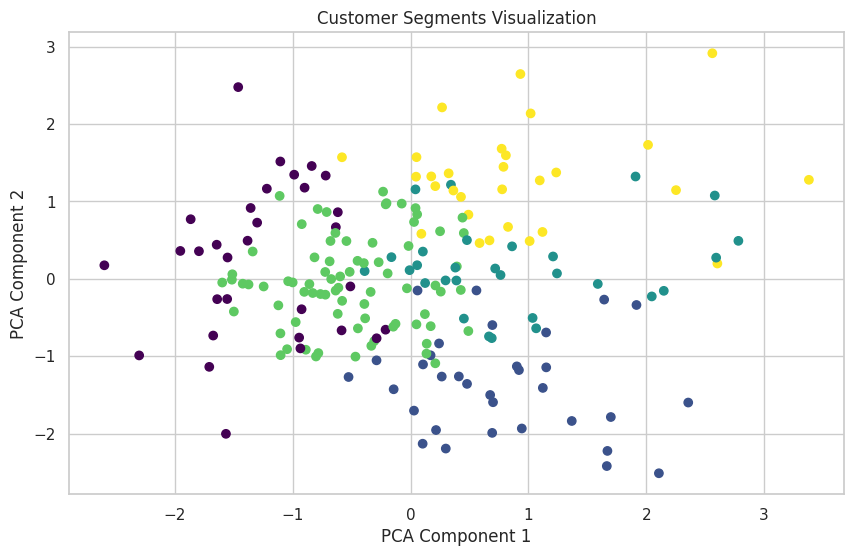

DB Index:  1.108179281522266


Category,Books,Clothing,Electronics,Home Decor,Cluster
CustomerID,,,,,
C0001,114.60,0.00,2827.30,412.62,1
C0002,0.00,1025.46,0.00,837.28,3
C0003,0.00,122.36,1385.20,1217.82,3
C0004,1888.48,0.00,1355.74,2110.66,0
C0005,0.00,0.00,1180.38,853.86,3


In [14]:
# Step 6.2: Applying KMeans clustering

# Let's test with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(category_scaled)

# Add cluster labels to the original data
category_pivot['Cluster'] = kmeans.labels_

# Visualizing the clusters using a scatter plot (2D PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(category_scaled)

plt.figure(figsize=(10,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=category_pivot['Cluster'], cmap='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Calculate DB Index
db_index = davies_bouldin_score(category_scaled, kmeans.labels_)
print("DB Index: ", db_index)

# Save clustering results to a CSV file
category_pivot.to_csv('Anusha_Khot_Customer_Segmentation.csv', index=False)

# Display final results
category_pivot.head()



In [12]:
# Step 7: Save all final outputs as required

# Save clustering results to a CSV file
category_pivot.to_csv('Customer_Segmentation.csv')

# Display final results
category_pivot.head()


Category,Books,Clothing,Electronics,Home Decor,Cluster
CustomerID,,,,,
C0001,114.60,0.00,2827.30,412.62,1
C0002,0.00,1025.46,0.00,837.28,3
C0003,0.00,122.36,1385.20,1217.82,3
C0004,1888.48,0.00,1355.74,2110.66,0
C0005,0.00,0.00,1180.38,853.86,3
